# Implementation of Image Segmentation and Super Pixels using Image Processing by Conditional Random Fields:

# Part A- Image segmentation and formation of Super Pixels:

We import the basic libraries necessary for our project using Python, which includes NumPy, Matplotlib, Python imaging Library.

In [180]:
import skimage
skimage.__version__

'0.13.1'

In [181]:

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt #Importing libraries for our project, scikit image is what I used

In [182]:
from PIL import Image
import cv2
#Importing opencv library to input any real life picture
myImage = Image.open("tajmahal1.jpg");
#myImage.show();
tajmahal=myImage
im = cv2.imread("tajmahal1.jpg")
tajmahal = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
tajmahal1 = cv2.cvtColor(im, cv2.COLOR_BGR2HLS)
#above code is mainly for converting any data to black and white data and analyzing it
#ngcm= greycomatrix(im, [1], [0], 256, symmetric=False, normed=True)

In [183]:
from skimage import data
#tajmahal = data.moon()

Using Matplotlib, we convert the image into a Grayscale Image and hence, work on this data, as Matplotlib now converts it into an array which will be used directly as an input for pre-processing. So we do so for any kind of Image given as input.

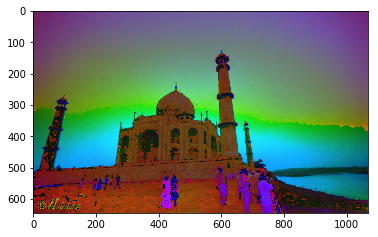

In [184]:
plt.imshow(tajmahal1, cmap='gray')

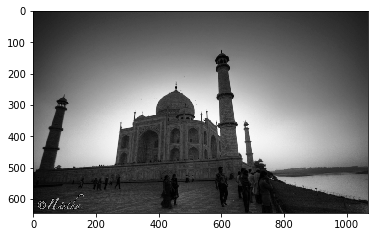

In [185]:
plt.imshow(tajmahal, cmap='gray')

We use the Selenium filter, a morphological feature which returns a structuring element where elements of neighbourhood are 0 and 1.

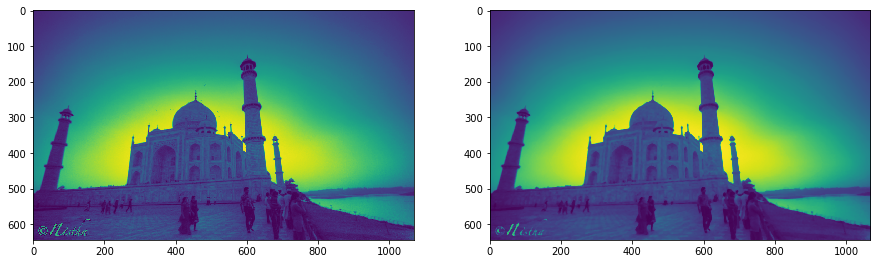

In [186]:
from skimage import filters

tajmahal_denoised = filters.median(tajmahal, selem=np.ones((5, 5)))
#selem is structuring element 
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(tajmahal)
ax1.imshow(tajmahal_denoised);

We now plot the required boundary points using the value of standard deviation which helps in deciding the threshold of the data needed out for pre-processing which can be automated directly using machine learning, but here, we have shown for values to show the different feature maps for classification. 

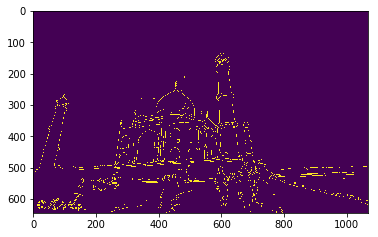

In [187]:
from skimage import feature
edges = skimage.feature.canny(tajmahal, sigma=01.2)

plt.imshow(edges)

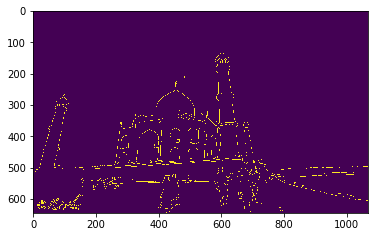

In [188]:
from skimage import feature
edges = skimage.feature.canny(tajmahal, sigma=1.5)

plt.imshow(edges)

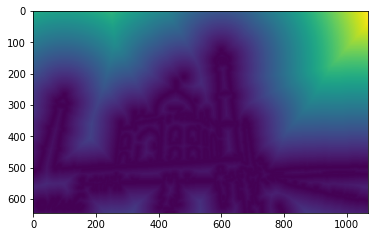

In [189]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt);

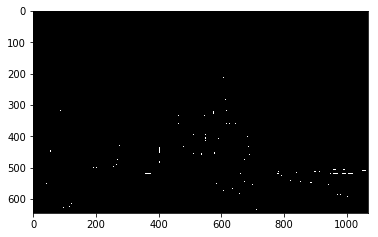

In [190]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray');

In [191]:
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)
peak_idx[:]

array([[636, 682],
       [635, 682],
       [634, 682],
       ...,
       [142, 603],
       [142, 602],
       [142, 601]])

We get the set of maxima points which is used for clustering of data points using the distance metric of d(x,y)=||x-y|| and hence, creates a feature map, which is classified based on color maps alloted and segments the data directly into 2 colors which splits the data into 2 segments.

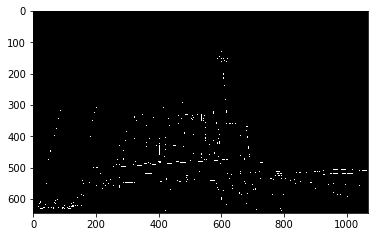

In [192]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=1)
plt.imshow(local_max, cmap='gray');

In [193]:
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=2)
peak_idx[:]

array([[640, 794],
       [640, 714],
       [639, 794],
       ...,
       [129, 600],
       [128, 600],
       [127, 600]])

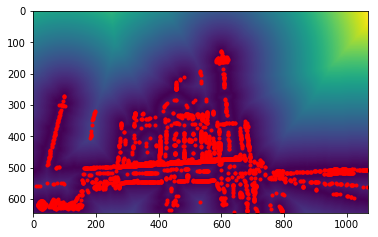

In [194]:
plt.plot(peak_idx[:,1], peak_idx[:,0], 'r.')
plt.plot(peak_idx[1], peak_idx[0], 'r.')
plt.imshow(dt);

In [195]:
from skimage import measure

markers = measure.label(local_max)


This is a set of super pixels formed by the feature classification and here is where the color maps are alloted based on the pixel density of the colors, which is alloted based on the array we initially created using Matplotlib library.

# Formation of Super Pixels:

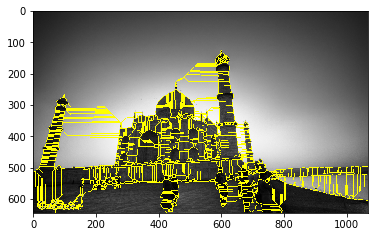

In [196]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(tajmahal, labels));

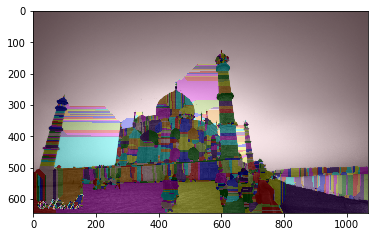

In [197]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=tajmahal));

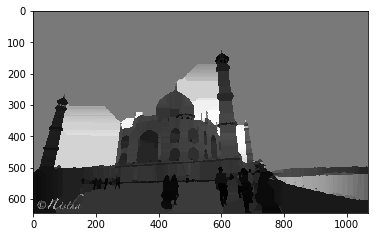

In [198]:
plt.imshow(color.label2rgb(labels, image=tajmahal, kind='avg'), cmap='gray');


In [199]:
regions = measure.regionprops(labels, intensity_image=tajmahal)

In [200]:
#print(regions)

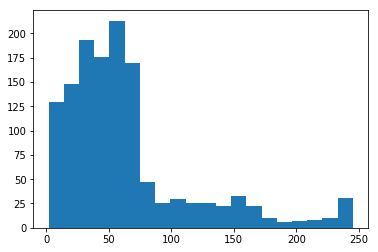

In [201]:
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [202]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[ 44.4911453 ]
 [166.03060593]]


In [203]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

We created a n-tuple which helps in storing the coordinates of the region and hence, decides the bounds for the clear classification. 

In [204]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

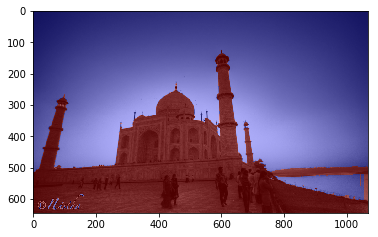

In [205]:
plt.imshow(color.label2rgb(classified_labels, image=tajmahal));

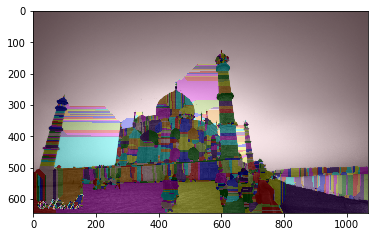

In [206]:
plt.imshow(color.label2rgb(classified_labels, image=tajmahal),cmap='gray');
from skimage import color
plt.imshow(color.label2rgb(labels, image=tajmahal));

Hence, we get the segmented data in the end, and use this as an input for data processing ahead, which leads an accuracy increase due to more refined data. Further steps have been described below.